# 导入相应必须的包

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

# 我们将载入seaborn,但是因为载入时会有警告出现，  
#因此先载入warnings，忽略警告
import warnings 
warnings.filterwarnings("ignore")

# 导入数据

In [2]:
df_train = pd.read_csv('train.csv')

## 观察源数据

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


81列，其中特征80个，包含预测标签1个，特征标签79个。

In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 浏览一下字段

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 看看数据的情况

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

共有1460条记录

# 弄懂各字段的含义
一般都是官网有，需要翻译，下面我列出来大家看看，  
想不到描述一个房屋用了这么多的特征字段，已经超出了我的想象，  
不过多比少好，多了可以少，少了就很尴尬！

 SalePrice: 销售价格<br>
 MSSubClass: 建筑类<br>
LotFrontage: 直线距离<br>
LotArea:土地面积（平凡英尺）<br>
Street: 路的类型 <br>
Alley : 胡同类型<br>
LotShape:房产的形状（是否规则）<br>
LandCounter: 房产的平坦度<br>
Utitles: 公共设备 设施<br>
LotConfig: 划分配置<br>
LandSlope:斜坡程度<br>
Neighborhood: 在Ames city范围的物理位置<br>
Condition1:接近各种条件<br>
Condition2: 接近各种条件<br>
BldgType :住宅的类型<br>
HouseStyle :住宅的风格<br>
OverallQual :给房屋整体材料和装修评分<br>
OverallCond: 为房屋的整体状况评分<br>
YearBuilt: 建造日期<br>
YearRemodAdd: 重新改造日期<br>
RoofStyle :屋顶的类型<br>
RoofMatl :屋顶材料<br>
Exterior1st:房屋外部覆盖物<br>
Exterior2nd:房屋外部覆盖物(不止一种)<br>
MasVnrType :砌体单板类型<br>
MasVnrArea ：单位买诺记的砌体木皮面积<br>
ExterQual : 外部材料的质量评价<br>
ExterCond: 评估外部材料的现状<br>
Foundation :基础类型<br>
BsmtQual : 评估地下室的高度<br>
BsmtCond :评估地下室的一般状况<br>
BsmtExposure :出口或花园墙壁曝光程度<br>
BsmtFinType1 :地下室完工面积比<br>
BsmtFinSF1 :类型1完成平方英尺<br>
BsmtFinType2 :地下室完工面积比（如果不止一种）<br>
BsmtFinSF2 :类型2完成平方英尺<br>
BsmtUnfsF :未完成的地下室平方英尺<br>
TotalBsmtSF :地下室总面积<br>
Heating QC: 热暖质量和条件<br>
CentraAir : 是否有中央空调<br>
Electrical :电气系统<br>
1stFlrSF：一楼平方英尺<br>
2ndFlrSF：二楼平方英尺<br>
LowQualFinSF：低质量完成平方英尺（所有地板）<br>
GrLivArea：高于（地面）居住面积的平方英尺<br>
BsmtFullBath：地下室完整的浴室<br>
BsmtHalfBath：地下室半浴室<br>
FullBath：高档浴室<br>
HalfBath：高于等级的半浴室<br>
Bedroom :地上的卧室<br>
Kitchen: 高档厨房<br>
KitchenQual :厨房质量评估<br>
TotRmsAbvGrd :高档卧室（不包括浴室）<br>
Functional :家庭功能<br>
FireplaceQu :壁炉数量<br>
FireplaceQu :壁炉质量<br>
GarageType : 车库位置<br>
GarageYrBlt :车库建成年份<br>
GarageFinish : 车库的内部完成<br>
GarageCars: 车容量为单位的车库大小<br>
GarageArea : 以平方英尺为单位的车库大小<br>
GarageQua: 车库质量<br>
GarageCond :车库条件<br>
PavedDrive :铺设车道<br>
WoodDeckSF：木甲板面积(平方英尺的)<br>
OpenPorchSF：打开门廊面积(以平方英尺)<br>
EnclosedPorch：封闭门廊面积(以平方英尺)<br>
3SsnPorch：门廊(三个平方英尺的)<br>
ScreenPorch：屏幕门廊面积(平方英尺的)<br>
PoolArea：以平方英尺为单位的泳池面积<br>
PoolQC：泳池质量<br>
Fence : 栅栏质量<br>
MiscFeature :杂项功能未在其他类别中涵盖<br>
MiscVal：杂项功能的价值<br>
MoSold：月销量（MM）<br>
YrSold：已售出年份（YYYY）<br>
SaleType：销售类型<br>
SaleCondition：销售条件<br>

# 先看下标签数据：房价
SalePrice

In [7]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

没有空缺值<br>平均价格18.0921万<br>
最小值为3.49万，最大值为75.5万。 （美元哈）

# 看下标签分布

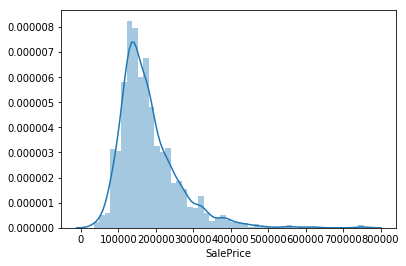

In [8]:
sns.distplot(df_train['SalePrice'])

# 查看地上面积GrLivArea与价格的关系
# TotalBsmtSF :地下室总面积与价格的关系

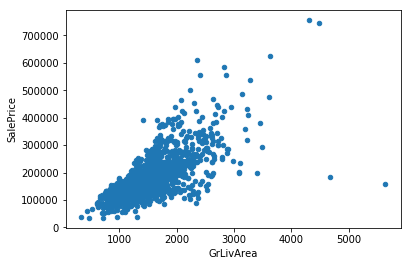

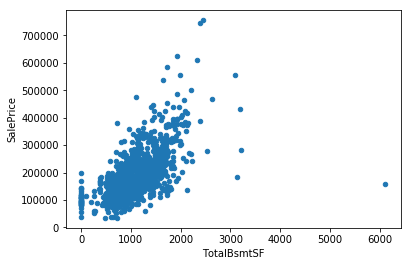

In [9]:
df_train.plot.scatter(x='GrLivArea',y='SalePrice')

#data  = pd.concat([df_train['SalePrice'],df_train['TotalBsmtSF']],axis =1)
df_train.plot.scatter(x='TotalBsmtSF',y='SalePrice')

有相对明显的线性关系，随着面积增大，价格呈现上升趋势

In [10]:
df_train['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

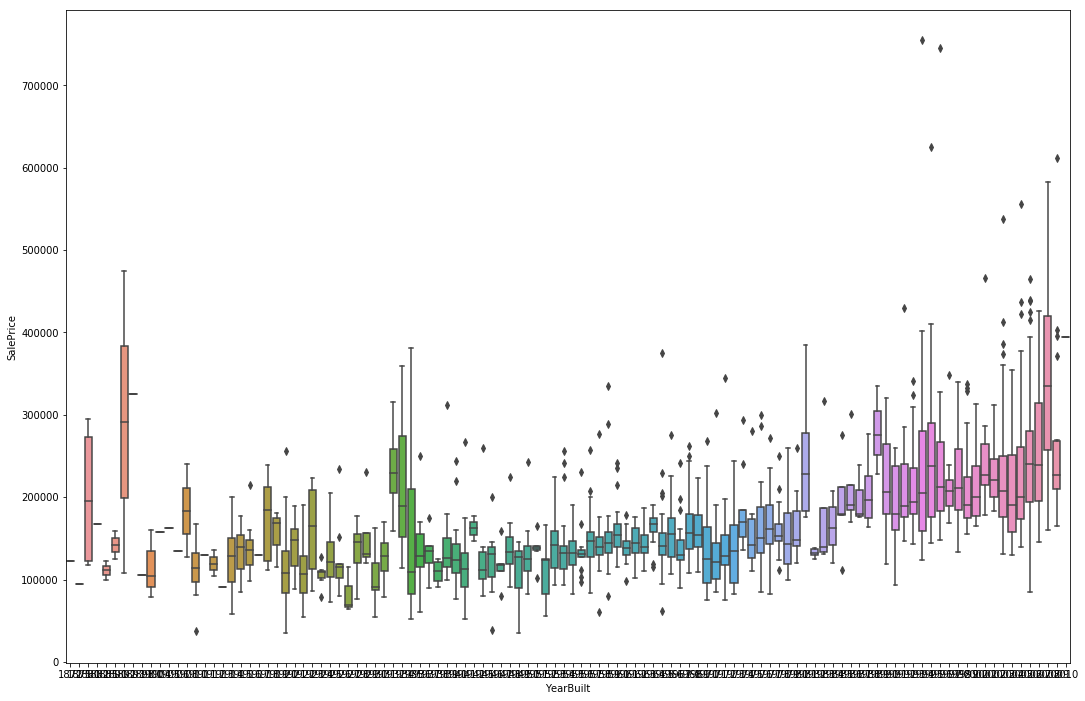

In [11]:
fig,ax =plt.subplots(figsize =(18,12))
sns.boxplot(x='YearBuilt',y='SalePrice',data = df_train)

从建筑年份看，没有很特别的趋势，但房子越新相对价格高。

相关系数:correlation matrix(heatmap style)


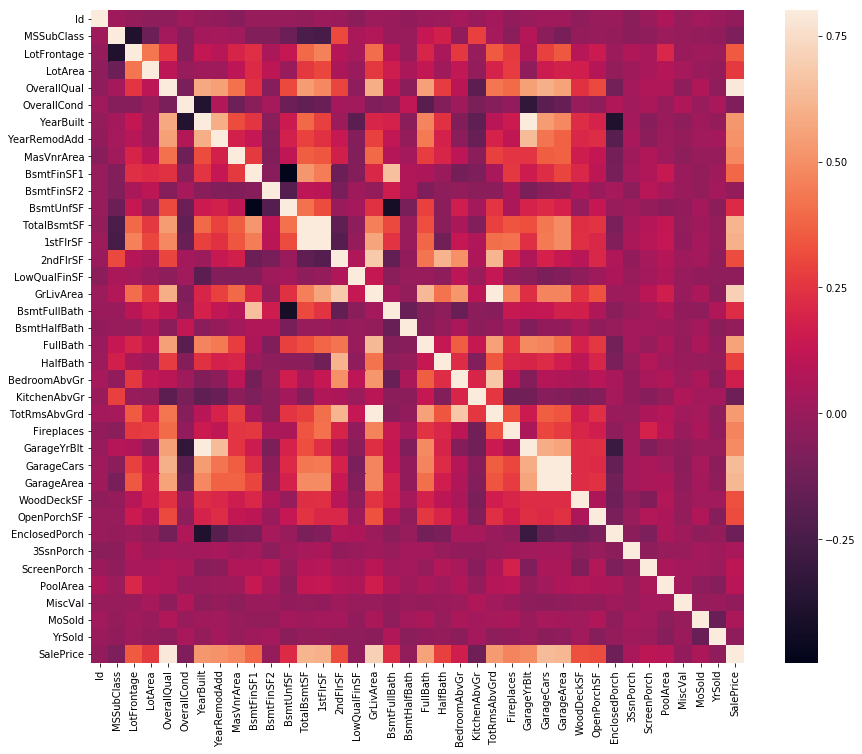

In [12]:
#correlation matrix
f ,ax =plt.subplots(figsize=(15,12))
sns.heatmap(df_train.corr(), vmax=0.8 ,square =True)

与SalePrice相关系数最大则颜色越浅，从图中看出，OverallQual,GrLiveArea,TotalBsmtSF, 1stFlrSF,GarageCars.<br>
# 如何选出最重要的10个特征？
correlation matrix(zoomed heatmap style) 

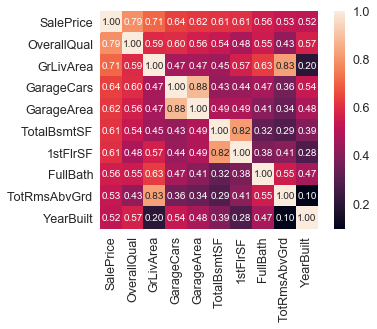

In [13]:
#Saleprice correlation matrix
k =10
cols =df_train.corr().nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale =1.25)
sns.heatmap(cm,cbar =True ,annot =True ,square =True ,fmt='.2f',annot_kws={'size':10},
    yticklabels=cols.values, xticklabels =cols.values)

OveralQual , GrLivArea, GarageCars , GarageArea ,TotalBsmtSF, 1stFlrSF ,FullBath,
TotRmsAbvGrd ,YearBuilt

In [14]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [15]:
num =df_train.isnull().sum().sort_values(ascending = False)
percent =(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data =pd.concat([num,percent],axis =1 ,keys =['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


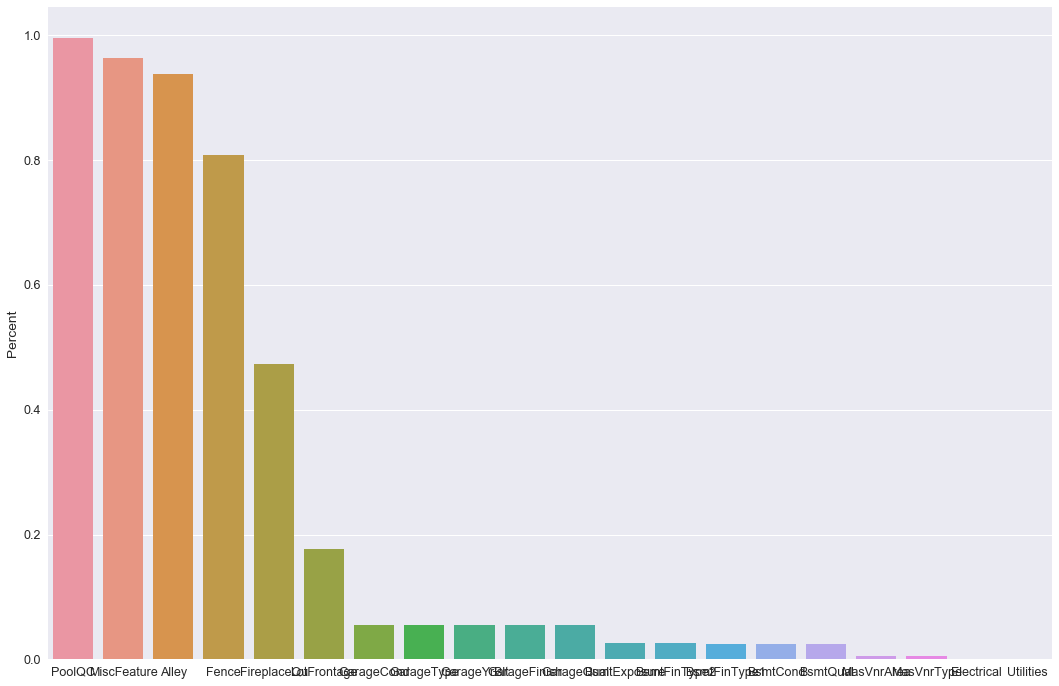

In [16]:
f ,ax = plt.subplots(figsize = (18,12))
sns.barplot(x =missing_data.index[:20],y=missing_data.Percent[:20])

In [17]:
missing_data.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'Utilities', 'YearRemodAdd',
       'MSSubClass', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd',
       'Exterior1st', 'RoofMatl', 'RoofStyle', 'YearBuilt', 'LotConfig',
       'OverallCond', 'OverallQual', 'HouseStyle', 'BldgType', 'Condition2',
       'BsmtFinSF1', 'MSZoning', 'LotArea', 'Street', 'Condition1',
       'Neighborhood', 'LotShape', 'LandContour', 'LandSlope', 'SalePrice',
       'HeatingQC', 'BsmtFinSF2', 'EnclosedPorch', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'BsmtUnfSF', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'Functional', 'TotRmsAbvGrd', 'KitchenQual', 'KitchenAbvGr',

In [18]:
df_train = df_train.drop((missing_data[missing_data['Total']>=1]).index,1)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

直方图 -峰度和偏度

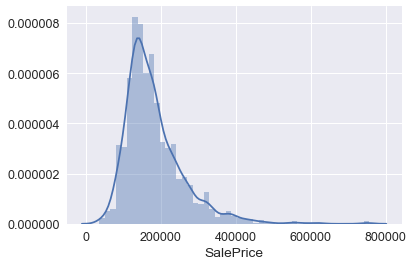

In [20]:
sns.distplot(df_train['SalePrice'])

读取数据

In [21]:
train_df = pd.read_csv('train.csv',index_col =0)
test_df =pd.read_csv('test.csv',index_col =0)

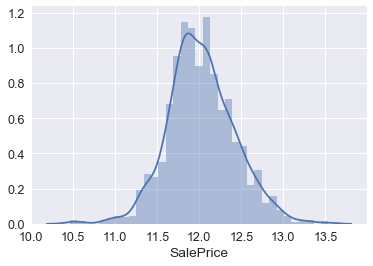

In [22]:
y_train = np.log1p(train_df.pop('SalePrice'))
sns.distplot(y_train)

In [23]:
all_df =pd.concat((train_df ,test_df),axis =0)

In [24]:
all_df.shape

(2919, 79)

In [25]:
all_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [26]:
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

#### 把category 的变量转变为numerical表达形式  
数字本身大小的含义会在模型中有影响，所以为了避免分类时的数值影响，  
采用pandas自带的get_dummies方法，实现one-hot .

In [27]:
pd.get_dummies(all_df['MSSubClass'],prefix='MSSubClass').head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


MSSSubClass 被我们分成了12个columns ,每一个代表一个Category, 是就是1，不是就是0  
  
 同样，将所有的category数据，都给One-Hot

In [28]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


处理数值numerical变量，  
处理缺失值问题

In [29]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageArea        1
dtype: int64

缺失值最多的是LotFrontage :Linear feet of street connected to property  
意思是与街道的直线距离

GarageYrBlt ,车库修建年份

等。。
采用平均值来填充

In [30]:
mean_cols =all_dummy_df.mean()
mean_cols.head(10)

MSSubClass         57.137718
LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
dtype: float64

In [31]:
all_dummy_df =all_dummy_df.fillna(mean_cols)

In [32]:
all_dummy_df.isnull().sum().sum()

0

填充完毕，已经没有缺省值了

In [33]:
pd.get_dummies(train_df['PoolQC']).ix[[198,199]]

,Ex,Fa,Gd
Id,,,
198,1,0,0
199,0,0,0


标准化数值型数据  
对于各个特征的数据范围不一样，影响诸如线性回归的效果不明显的问题。  
模型相对喜欢归一化的数据。

In [34]:
numeric_cols = all_df.columns[all_df.dtypes !='object']
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

数值化的特征有这么多，都要归一化处理，  
标准化： （X-X'）/S

In [35]:
numeric_col_mean =all_dummy_df.loc[: ,numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:,numeric_cols].std()
all_dummy_df.loc[:,numeric_cols] = (all_dummy_df.loc[: ,numeric_cols] - numeric_col_mean)/numeric_col_std

# Setp 4: 建立模型  
先把数据集分回  训练集和测试集

In [36]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [37]:
dummy_train_df.shape,dummy_test_df.shape

((1460, 288), (1459, 288))

### LR 线性回归
Ridge Regression 岭回归

In [38]:
from  sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [39]:
alphas  = np.logspace(-3,2,50)
alphas

array([  1.00000000e-03,   1.26485522e-03,   1.59985872e-03,
         2.02358965e-03,   2.55954792e-03,   3.23745754e-03,
         4.09491506e-03,   5.17947468e-03,   6.55128557e-03,
         8.28642773e-03,   1.04811313e-02,   1.32571137e-02,
         1.67683294e-02,   2.12095089e-02,   2.68269580e-02,
         3.39322177e-02,   4.29193426e-02,   5.42867544e-02,
         6.86648845e-02,   8.68511374e-02,   1.09854114e-01,
         1.38949549e-01,   1.75751062e-01,   2.22299648e-01,
         2.81176870e-01,   3.55648031e-01,   4.49843267e-01,
         5.68986603e-01,   7.19685673e-01,   9.10298178e-01,
         1.15139540e+00,   1.45634848e+00,   1.84206997e+00,
         2.32995181e+00,   2.94705170e+00,   3.72759372e+00,
         4.71486636e+00,   5.96362332e+00,   7.54312006e+00,
         9.54095476e+00,   1.20679264e+01,   1.52641797e+01,
         1.93069773e+01,   2.44205309e+01,   3.08884360e+01,
         3.90693994e+01,   4.94171336e+01,   6.25055193e+01,
         7.90604321e+01,

存下所有的CV值，看看哪个alpha值更好（调参）

In [40]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values
test_scores=[]
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv =10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5,1,'Alpha vs cv Error')

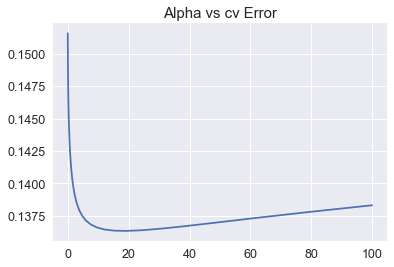

In [41]:
plt.plot(alphas,test_scores)
plt.title('Alpha vs cv Error')

alpha=10~20时，score达到0.135 处于误差最低

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
N_estimators = [50,100,150,200,260,350,400]
test_scores = []
for N in N_estimators:
    clf =RandomForestRegressor(n_estimators=N,max_features = 0.3)
    test_score = np.sqrt(-cross_val_score(clf , X_train , y_train,cv =5 ,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5,1,'N_estimator vs CV Error')

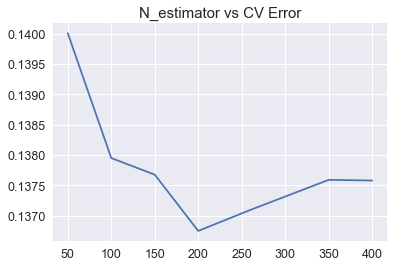

In [44]:
plt.plot(N_estimators , test_scores)
plt.title("N_estimator vs CV Error")

Step 5 : Ensemble

In [45]:
ridge = Ridge(alpha = 15)
rf = RandomForestRegressor(n_estimators=350 ,max_features = 0.3)
ridge.fit(X_train , y_train)
rf.fit(X_train , y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
ridge_predict = ridge.predict(X_test)
rf_predict =rf.predict(X_test)
test_score =rf.score(X_train,y_train)
print(test_score)
y_ridge = np.expm1(ridge_predict)
y_rf =np.expm1(rf_predict)

0.98409358295


In [47]:
y_final = (y_ridge+y_rf)/2

# Step 6:提交结果

In [48]:
submission_df =pd.DataFrame(data ={'Id':test_df.index,'SalePrice':y_final})

In [49]:
submission_df.head()

,Id,SalePrice
0,1461,119056.788720
1,1462,150819.414989
2,1463,174208.696849
3,1464,189355.439867
4,1465,193827.355786


In [50]:
submission_df.to_csv('ensemble_ridge_randomForest.csv',index=False)

In [51]:
from  sklearn.linear_model import RidgeCV
from pandas import DataFrame
clf = RidgeCV(alphas,cv=5)
clf.fit(dummy_train_df,y_train)
predict = clf.predict(dummy_train_df)
test_score =clf.score(dummy_train_df,y_train)
print(test_score)

0.918911876682


Text(0.5,1,'Alpha vs cv Error')

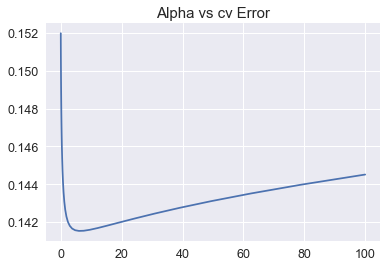

In [52]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values
test_scores=[]
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv =3,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(alphas,test_scores)
plt.title('Alpha vs cv Error')

# Bagging
Bagging是把很多小的分类器放在一起，综合最终结果：


In [53]:
from  sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score

Text(0.5,1,'N_estimators_params vs CV Error')

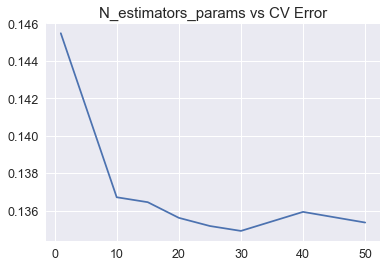

In [54]:
N_estimators_params = [1 , 10 , 15, 20 ,25 ,30 ,40 ,50]
test_scores = []
for N in N_estimators_params:
    clf =BaggingRegressor(n_estimators=N ,base_estimator =ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train ,y_train,cv =10,scoring ='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(N_estimators_params ,test_scores)
plt.title('N_estimators_params vs CV Error')

Bagging的误差达到了0.133，比单纯的使用Ridge 0.135好一些。说明Bagging确实带来了优化！

# Boosting
Boosting 比Bagging 理论上更高级点，为啥叫“提升”，就是弄了很多分类器，按照顺序的一个分类器  
对上一个分类器做“提升”，让上一个分类器做得不好的地方给它重视（更多的权重）起来，  
下次分类器就知道那里跟该优化了。

In [55]:
from sklearn.ensemble import AdaBoostRegressor

Text(0.5,1,'N_estimators_params vs CV Error')

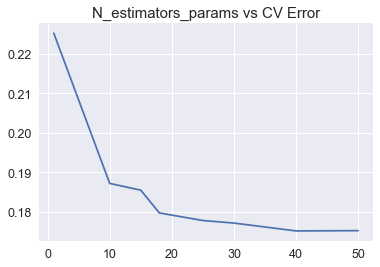

In [61]:
N_estimators_params = [1,10 ,15 ,18,25 ,30 ,40,50]
test_scores = []
ridge = Ridge(alpha = 15)
for N in N_estimators_params:
    clf =AdaBoostRegressor(n_estimators=N )# ,base_estimator =ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train ,y_train,cv =10,scoring ='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(N_estimators_params ,test_scores)
plt.title('N_estimators_params vs CV Error')

# XGBoost
看看kaggle界最神奇的XGBoost，华盛顿大学陈天奇大神研究的算法

In [57]:
from xgboost import XGBRegressor

Text(0.5,1,'max_dpth vs CV error')

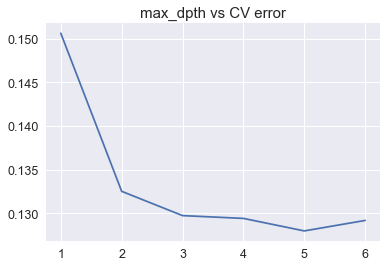

In [58]:
params =[1,2,3,4,5,6]
test_scores =[]
for param in params:
    clf =XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf ,X_train ,y_train ,cv =10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)
plt.title('max_dpth vs CV error')

In [59]:
clf = XGBRegressor(max_depth=5)
clf.fit(X_train ,y_train)
xgboost_predict =clf.predict(X_test)
test_score =clf.score(X_train,y_train)
print(test_score)
y_xgboost = np.expm1(xgboost_predict)

0.979171319944


In [60]:
submission_df =pd.DataFrame(data ={'Id':test_df.index,'SalePrice':y_final})
submission_df.to_csv('xgboost_submission1.csv',index=False)